# Passive degrees of freedom



Passive dofs!

In [1]:
from blop.utils import prepare_re_env  # noqa

%run -i $prepare_re_env.__file__ --db-type=temp

2025-03-04 21:34:25.538 INFO: Executing plan <generator object Agent.learn at 0x7f7a69d1daf0>


2025-03-04 21:34:25.540 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7f7a6b0275e0> from 'idle' -> 'running'


2025-03-04 21:34:25.542 INFO: running iteration 1 / 1




Transient Scan ID: 1     Time: 2025-03-04 21:34:25

Persistent Unique Scan ID: '96b1fb2e-5ce0-4553-aabf-a4b07790252a'

New stream: 'primary'

+-----------+------------+------------+------------+------------+------------+------------+

|   seq_num |       time |         x1 |         x2 |         x3 |  brownian1 |  brownian2 |

+-----------+------------+------------+------------+------------+------------+------------+

|         1 | 21:34:25.6 |     -0.061 |      0.099 |      0.000 |     -0.010 |      0.011 |

|         2 | 21:34:26.0 |     -1.227 |     -2.064 |      0.000 |     -0.065 |      0.242 |

|         3 | 21:34:26.4 |      0.095 |     -4.306 |      0.000 |      0.109 |     -0.160 |

|         4 | 21:34:26.8 |     -2.213 |     -4.439 |      0.000 |     -0.067 |     -0.244 |

|         5 | 21:34:27.2 |     -4.509 |     -2.606 |      0.000 |      0.299 |     -0.274 |

|         6 | 21:34:27.6 |     -3.307 |     -0.303 |      0.000 |      0.381 |     -0.032 |

|         7 | 21:34:28.0 |     -2.901 |      1.936 |      0.000 |      0.213 |     -0.191 |

|         8 | 21:34:28.3 |     -4.278 |      4.566 |      0.000 |      0.484 |     -0.118 |

|         9 | 21:34:28.7 |     -1.496 |      2.810 |      0.000 |      0.213 |     -0.180 |

|        10 | 21:34:29.1 |      1.114 |      3.454 |      0.000 |      0.225 |     -0.180 |

|        11 | 21:34:29.5 |      3.410 |      4.199 |      0.000 |      0.095 |      0.182 |

|        12 | 21:34:29.8 |      4.396 |      1.798 |      0.000 |     -0.201 |      0.327 |

|        13 | 21:34:30.2 |      2.315 |      1.138 |      0.000 |     -0.395 |      0.343 |

|        14 | 21:34:30.6 |      4.312 |     -0.951 |      0.000 |     -0.125 |      0.063 |

|        15 | 21:34:30.9 |      1.472 |     -1.691 |      0.000 |     -0.206 |      0.212 |

|        16 | 21:34:31.3 |      2.877 |     -3.640 |      0.000 |     -0.540 |      0.391 |

+-----------+------------+------------+------------+------------+------------+------------+

generator list_scan ['96b1fb2e'] (scan num: 1)

/opt/hostedtoolcache/Python/3.10.16/x64/lib/python3.10/site-packages/bluesky/callbacks/fitting.py:171: RuntimeWarning: invalid value encountered in scalar divide
  results = [np.sum(input * grids[dir].astype(float), labels, index) / normalizer for dir in range(input.ndim)]


2025-03-04 21:34:32.917 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7f7a6b0275e0> from 'running' -> 'idle'


2025-03-04 21:34:32.918 INFO: Cleaned up from plan <generator object Agent.learn at 0x7f7a69d1daf0>


('96b1fb2e-5ce0-4553-aabf-a4b07790252a',)

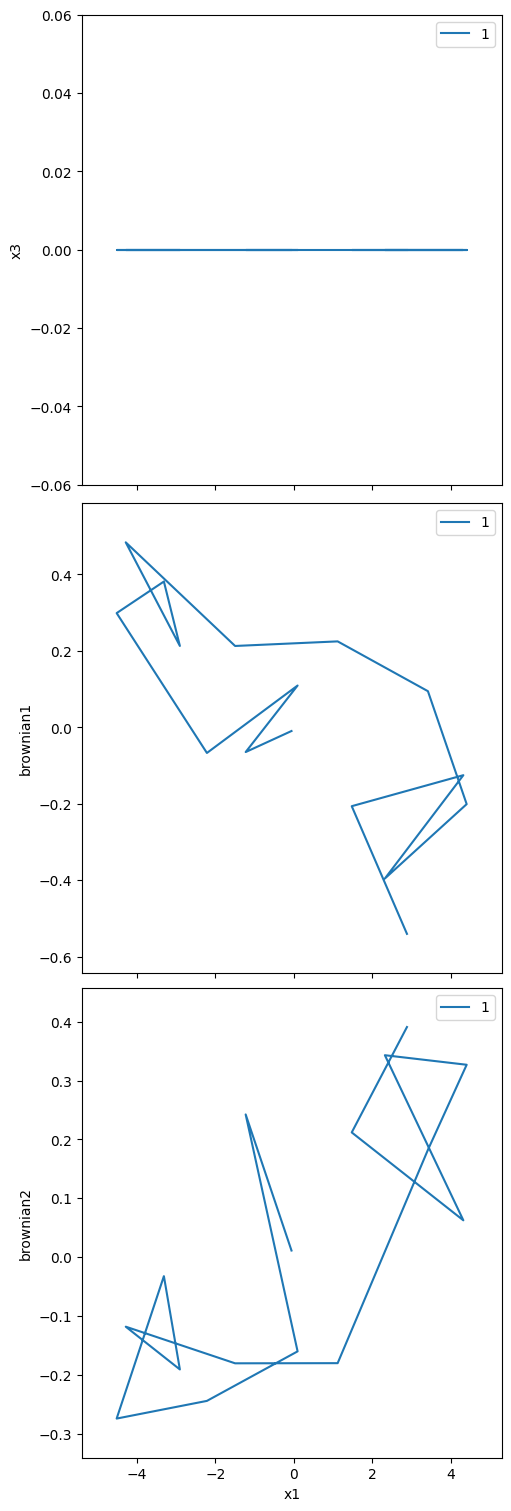

In [2]:
from blop import DOF, Agent, Objective
from blop.digestion.tests import constrained_himmelblau_digestion
from blop.dofs import BrownianMotion

dofs = [
    DOF(name="x1", search_domain=(-5.0, 5.0)),
    DOF(name="x2", search_domain=(-5.0, 5.0)),
    DOF(name="x3", search_domain=(-5.0, 5.0), active=False),
    DOF(device=BrownianMotion(name="brownian1"), read_only=True),
    DOF(device=BrownianMotion(name="brownian2"), read_only=True, active=False),
]

objectives = [
    Objective(name="himmelblau", target="min"),
]

agent = Agent(
    dofs=dofs,
    objectives=objectives,
    digestion=constrained_himmelblau_digestion,
    db=db,
    verbose=True,
    tolerate_acquisition_errors=False,
)

RE(agent.learn("qr", n=16))

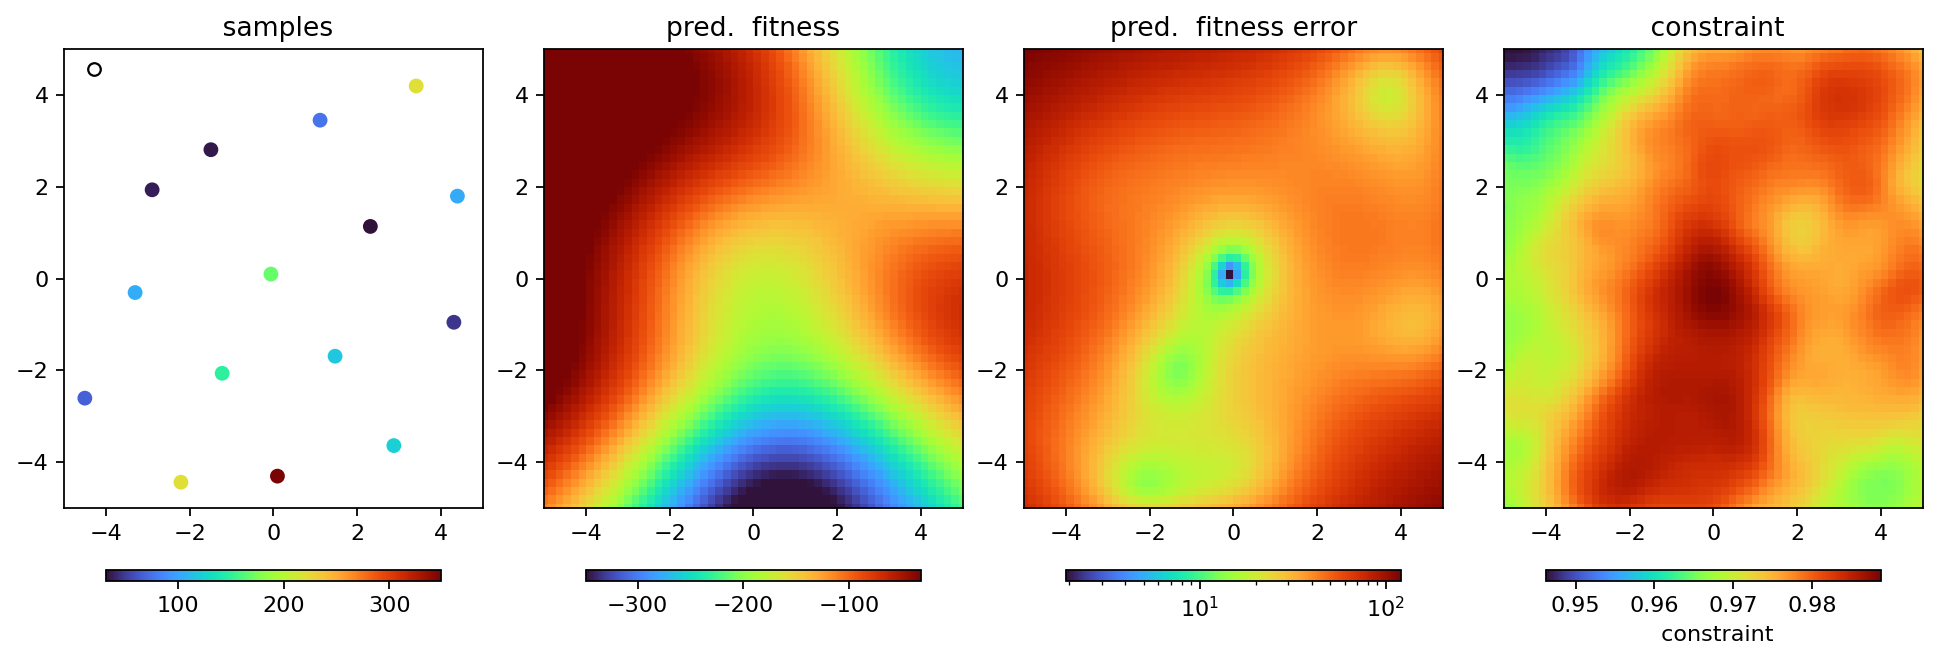

In [3]:
agent.plot_objectives()